In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

Load in Data from CSV

In [21]:
df = pd.read_csv('/home/sabsr3/Rotations/ADCC/ADCC-Project/Data/basic_model_synthetic_data.csv')

Extract Data

In [22]:
# dataframe for mu=20 and 1% noise

df1 = df.loc[(df['mu'] == 20) & (df['noise level'] == 0.01) & (df['t'].isin([0.0, 1.0]))]
print(df1)

       Unnamed: 0    t    mu     gamma  noise level         A         R  \
1760         1760  0.0  20.0  1.000000         0.01  0.991667  0.000000   
1770         1770  1.0  20.0  1.000000         0.01  1.007949  0.000174   
1771         1771  0.0  20.0  1.000000         0.01  1.005572  0.000000   
1781         1781  1.0  20.0  1.000000         0.01  1.000629  0.000175   
1782         1782  0.0  20.0  1.000000         0.01  0.996306  0.000000   
...           ...  ...   ...       ...          ...       ...       ...   
15047       15047  1.0  20.0  0.000001         0.01  0.997734  0.992653   
15048       15048  0.0  20.0  0.000001         0.01  1.000880  0.000000   
15058       15058  1.0  20.0  0.000001         0.01  1.009467  1.000656   
15059       15059  0.0  20.0  0.000001         0.01  0.999209  0.000000   
15069       15069  1.0  20.0  0.000001         0.01  0.999596  1.003753   

              S         C  
1760   0.994932  0.000000  
1770   0.999830  0.902839  
1771   1.009727

In [23]:
gamma_vals = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6] 
df_kpercent = pd.DataFrame(columns=['gamma', 'kill percentage'])
for gamma in gamma_vals:
    data = df1.loc[df1['gamma'] == gamma]
    S_vals = data['S'].values
    for i in np.arange(0, 19, 2):
        kill_percent = 1 - (S_vals[i + 1]/S_vals[i])
        df_kpercent = df_kpercent.append({'gamma' : gamma,
                                          'kill percentage' : kill_percent}, ignore_index=True)
    
max_vals = []
min_vals = []
mean_vals = []

for gamma in gamma_vals:
    gamma_data = df_kpercent.loc[df_kpercent['gamma'] == gamma]
    percentage_data = gamma_data['kill percentage'].values
    max_vals.append(percentage_data.max())
    min_vals.append(percentage_data.min())
    mean_vals.append(percentage_data.mean())


(0.0, -15.0)

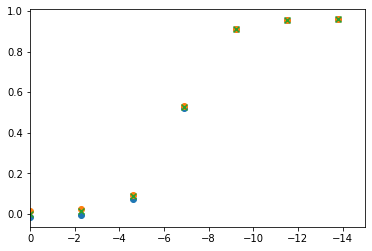

In [24]:
fig, ax = plt.subplots()

ax.scatter(np.log(gamma_vals), min_vals)
ax.scatter(np.log(gamma_vals), max_vals)
ax.scatter(np.log(gamma_vals), mean_vals, marker = 'x')
ax.set_xlim([0, -15])

Call in class to calculate kill percentage data

In [25]:
sys.path.append('/home/sabsr3/Rotations/ADCC/ADCC-Project')
import data_visualisation
from data_visualisation import BasicModelDataVisualisation

In [26]:
mu_vals = [1.25, 2.5, 5, 10, 20]
gamma_vals = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
data_tinkerer = BasicModelDataVisualisation(mu_vals, gamma_vals, '/home/sabsr3/Rotations/ADCC/ADCC-Project/Data/basic_model_synthetic_data_Hill_v1.csv')

In [27]:
max_data, min_data, mean_data = data_tinkerer.calculate_kill_percentage(0.01)

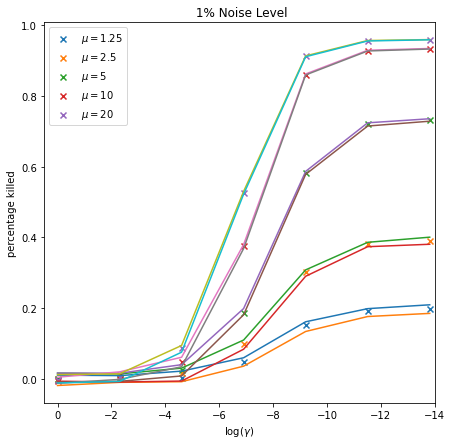

In [28]:
fig, ax = plt.subplots(figsize=(7, 7))

for i in range(len(mu_vals)):
    ax.plot(np.log(gamma_vals), max_data[i])
    ax.plot(np.log(gamma_vals), min_data[i])
    ax.scatter(np.log(gamma_vals), mean_data[i], label = '$\mu =$' + str(mu_vals[i]), marker = 'x')
    ax.set_xlabel('log($\gamma$)')
    ax.set_ylabel('percentage killed')
    ax.set_xlim([0.5, -14])
    ax.set_title(' 1% Noise Level')
    ax.legend()
    

plt.show()

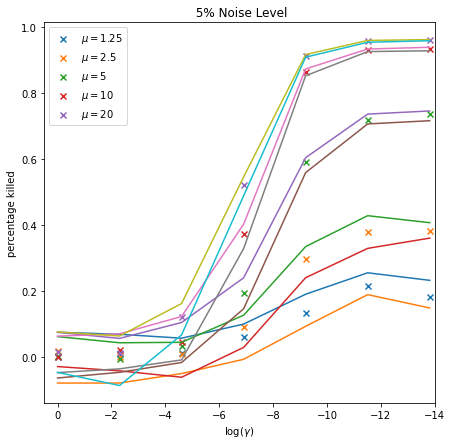

In [29]:
max_data, min_data, mean_data = data_tinkerer.calculate_kill_percentage(0.05)
fig, ax = plt.subplots(figsize=(7, 7))

for i in range(len(mu_vals)):
    ax.plot(np.log(gamma_vals), max_data[i])
    ax.plot(np.log(gamma_vals), min_data[i])
    ax.scatter(np.log(gamma_vals), mean_data[i], label = '$\mu =$' + str(mu_vals[i]), marker = 'x')
    ax.set_xlabel('log($\gamma$)')
    ax.set_ylabel('percentage killed')
    ax.set_xlim([0.5, -14])
    ax.set_title(' 5% Noise Level')
    ax.legend()
    

plt.show()

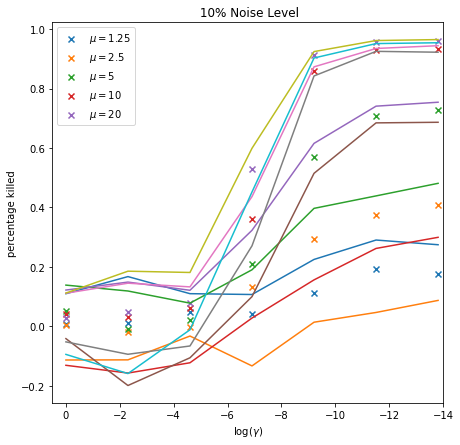

In [30]:
max_data, min_data, mean_data = data_tinkerer.calculate_kill_percentage(0.1)

fig, ax = plt.subplots(figsize=(7, 7))

for i in range(len(mu_vals)):
    ax.plot(np.log(gamma_vals), max_data[i])
    ax.plot(np.log(gamma_vals), min_data[i])
    ax.scatter(np.log(gamma_vals), mean_data[i], label = '$\mu =$' + str(mu_vals[i]), marker = 'x')
    ax.set_xlabel('log($\gamma$)')
    ax.set_ylabel('percentage killed')
    ax.set_xlim([0.5, -14])
    ax.set_title(' 10% Noise Level')
    ax.legend()
    

plt.show()

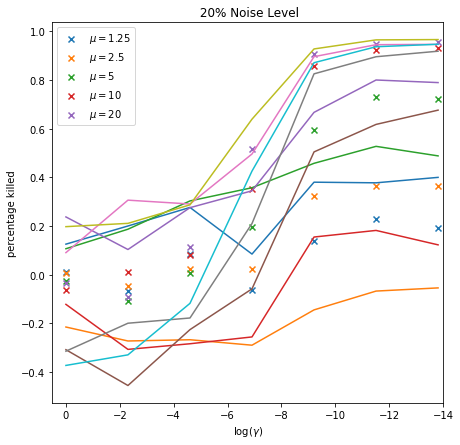

In [31]:
max_data, min_data, mean_data = data_tinkerer.calculate_kill_percentage(0.2)

fig, ax = plt.subplots(figsize=(7, 7))

for i in range(len(mu_vals)):
    ax.plot(np.log(gamma_vals), max_data[i])
    ax.plot(np.log(gamma_vals), min_data[i])
    ax.scatter(np.log(gamma_vals), mean_data[i], label = '$\mu =$' + str(mu_vals[i]), marker = 'x')
    ax.set_xlabel('log($\gamma$)')
    ax.set_ylabel('percentage killed')
    ax.set_title(' 20% Noise Level')
    ax.set_xlim([0.5, -14])
    ax.legend()
    

plt.show()